In [1]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def eq1(r,l):
    return r**4/l

def eq2(d,l):
    return d**4/l

def d(r):
    return 2*r

def r(d):
    return d/2

def I(V,t):
    return V/t

def mean(a):
    return sum(a)/len(a)

d1=0.80
l1=119.6
d4=0.95
l4=118.5
d3=0.82
l3=81.7
d5=0.89
l5=80
d2=0.82
l2=122.3

print('d 1',eq2(d1,l1))
print('d 2',eq2(d2,l2))
print('d 3',eq2(d3,l3))
print('d 4',eq2(d4,l4))
print('d 5',eq2(d5,l5))

d 1 0.0034247491638795995
d 2 0.003696825511038429
d 3 0.00553392607099143
d 4 0.00687347046413502
d 5 0.007842780125


[0.2786885245901639+/-0.016621044817052635
 0.30085959885386815+/-0.024263666637051408
 0.27910685805422647+/-0.010106909488038648
 0.27845845399866337+/-0.01129272640424173
 0.30437188710570007+/-0.02812780402998205]
[4.96928431 0.02852677]


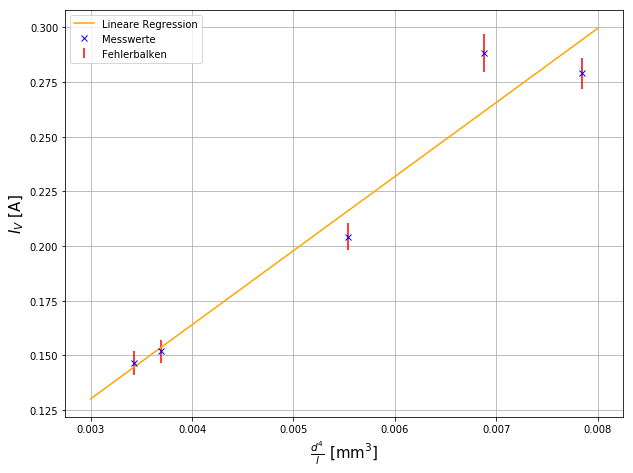

In [3]:
uv=0.5
ut=0.3

I1=mean(np.array([I(ufloat(5.5,uv),ufloat(38.56,ut)),I(ufloat(6.0,uv),ufloat(40.14,ut)),I(ufloat(7.5,uv),ufloat(50.74,ut)),I(ufloat(8.0,uv),ufloat(59.79,ut)),I(ufloat(5.0,uv),ufloat(31.52,ut))]))
I4=mean(np.array([I(ufloat(8.5,uv),ufloat(30.50,ut)),I(ufloat(6.3,uv),ufloat(20.94,ut)),I(ufloat(14.0,uv),ufloat(50.16,ut)),I(ufloat(12.5,uv),ufloat(44.89,ut)),I(ufloat(5.5,uv),ufloat(18.07,ut))]))
I3=mean(np.array([I(ufloat(9.7,uv),ufloat(48.52,ut)),I(ufloat(7.0,uv),ufloat(34.81,ut)),I(ufloat(8.0,uv),ufloat(38.8,ut)),I(ufloat(5.5,uv),ufloat(25.58,ut)),I(ufloat(11.5,uv),ufloat(57.77,ut))]))
I5=mean(np.array([I(ufloat(13.0,uv),ufloat(47.28,ut)),I(ufloat(9.0,uv),ufloat(32.83,ut)),I(ufloat(6.0,uv),ufloat(20.32,ut)),I(ufloat(11.7,uv),ufloat(42.32,ut)),I(ufloat(15.0,uv),ufloat(54.86,ut))]))
I2=mean(np.array([I(ufloat(5.0,uv),ufloat(31.09,ut)),I(ufloat(7.7,uv),ufloat(56.25,ut)),I(ufloat(7.5,uv),ufloat(50.15,ut)),I(ufloat(7.0,uv),ufloat(45.27,ut)),I(ufloat(6.0,uv),ufloat(38.184,ut))]))

print(np.array([I(ufloat(8.5,uv),ufloat(30.50,ut)),I(ufloat(6.3,uv),ufloat(20.94,ut)),I(ufloat(14.0,uv),ufloat(50.16,ut)),I(ufloat(12.5,uv),ufloat(44.89,ut)),I(ufloat(5.5,uv),ufloat(18.07,ut))]))

#Iarrayn=[I1.n,I2.n,I3.n,I4.n,I5.n]
#Iarrays=[I1.s,I2.s,I3.s,I4.s,I5.s]

Iarrayn=[I1.n,I2.n,I3.n,I5.n,I4.n]
Iarrays=[I1.s,I2.s,I3.s,I5.s,I4.s]

#darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d4,l4),eq2(d5,l5)]
darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d5,l5),eq2(d4,l4)]
#darrayn=[eq2(d1,l1).n,eq2(d2,l2).n,eq2(d3,l3).n,eq2(d4,l4).n,eq2(d5,l5).n]
#darrays=[eq2(d1,l1).s,eq2(d2,l2).s,eq2(d3,l3).s,eq2(d4,l4).s,eq2(d5,l5).s]

#Polynom
def fitfunc(x,a,b):
    return a*x+b

#Fitten
xfit=np.linspace(0.003,0.008,100)
popt,pcov=curve_fit(fitfunc,darray,Iarrayn)
a,b=popt
c,d=pcov
fit=a*xfit+b

#Ausgabe
plt.plot(xfit,fit,'-',color='orange',label='Lineare Regression')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit)+fit
dfit2=(a-c)*(xfit)+fit
#plt.plot(xfit,dfit1,'--',color='orange')
#plt.plot(xfit,dfit2,'--',color='orange')

plt.plot(darray,Iarrayn,'x',label='Messwerte',color='blue')
plt.errorbar(x=darray,y=Iarrayn,yerr=Iarrays,fmt='none',label='Fehlerbalken',color='red')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\frac{d^4}{l}\ [\mathrm{mm}^3]$',size='15')
plt.ylabel(r'$I_V\ [\mathrm{A}]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.legend()
plt.show()